# Importing Libraries

In [2]:
# To help with reading and manipulating data
import pandas as pd
import numpy as np

# To help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# To be used for missing value imputation
from sklearn.impute import SimpleImputer

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

# This will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

<IPython.core.display.Javascript object>

# Loading Data

In [3]:
data = pd.read_csv("BankChurners.csv")

<IPython.core.display.Javascript object>

In [4]:
# Number of rows and colums
data.shape

(10127, 21)

<IPython.core.display.Javascript object>

In [92]:
df = data.copy()

<IPython.core.display.Javascript object>

In [6]:
# first 5 rows
df.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School            NaN  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0              39                         5                       1   
1              44                         6                       1   
2              36                         4                       1   
3              34                         3                       4   
4              21                         5                       1   

   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                      3     12691.000                  777        11914.000   
1                      2      8256.000                  864         7392.000   
2                      0      3418.000                    0         3418.000   
3                      1      3313.000                 2517          796.000   
4                      0      4716.000                    0         4716.000   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  
0                  0.061  
1                  0.105  
2                  0.000  
3                  0.760  
4                  0.000

<IPython.core.display.Javascript object>

In [7]:
# last 5 rows
df.tail()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
10122        Graduate         Single     $40K - $60K          Blue   
10123             NaN       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate            NaN     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
10122              40                         3                       2   
10123              25                         4                       2   
10124              36                         5                       3   
10125              36                         4                       3   
10126              25                         6                       2   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
10122                      3      4003.000                 1851   
10123                      3      4277.000                 2186   
10124                      4      5409.000                    0   
10125                      3      5281.000                    0   
10126                      4     10388.000                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
10122         2152.000                 0.703            15476             117   
10123         2091.000                 0.804             8764              69   
10124         5409.000                 0.819            10291              60   
10125         5281.000                 0.535             8395              62   
10126         8427.000                 0.703            10294              61   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
10122                0.857                  0.462  
10123                0.683                  0.511  
10124                0.818                  0.000  
10125                0.722                  0.000  
10126                0.649                  0.189

<IPython.core.display.Javascript object>

In [8]:
# Checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

<IPython.core.display.Javascript object>

There are 20 columns in total with 10127 entries

Education_level and Marital_status have missing values

In [9]:
# checking duplicates
df.duplicated().sum()

0

<IPython.core.display.Javascript object>

# Checking missing values

In [10]:
data.isnull().sum()

CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

<IPython.core.display.Javascript object>

We see the count of the missing values

In [11]:
round(data.isnull().sum() / data.isnull().count() * 100, 2)

CLIENTNUM                   0.000
Attrition_Flag              0.000
Customer_Age                0.000
Gender                      0.000
Dependent_count             0.000
Education_Level            15.000
Marital_Status              7.400
Income_Category             0.000
Card_Category               0.000
Months_on_book              0.000
Total_Relationship_Count    0.000
Months_Inactive_12_mon      0.000
Contacts_Count_12_mon       0.000
Credit_Limit                0.000
Total_Revolving_Bal         0.000
Avg_Open_To_Buy             0.000
Total_Amt_Chng_Q4_Q1        0.000
Total_Trans_Amt             0.000
Total_Trans_Ct              0.000
Total_Ct_Chng_Q4_Q1         0.000
Avg_Utilization_Ratio       0.000
dtype: float64

<IPython.core.display.Javascript object>

In [12]:
# Summary
df.describe().T

count          mean          std           min  \
CLIENTNUM                10127.000 739177606.334 36903783.450 708082083.000   
Customer_Age             10127.000        46.326        8.017        26.000   
Dependent_count          10127.000         2.346        1.299         0.000   
Months_on_book           10127.000        35.928        7.986        13.000   
Total_Relationship_Count 10127.000         3.813        1.554         1.000   
Months_Inactive_12_mon   10127.000         2.341        1.011         0.000   
Contacts_Count_12_mon    10127.000         2.455        1.106         0.000   
Credit_Limit             10127.000      8631.954     9088.777      1438.300   
Total_Revolving_Bal      10127.000      1162.814      814.987         0.000   
Avg_Open_To_Buy          10127.000      7469.140     9090.685         3.000   
Total_Amt_Chng_Q4_Q1     10127.000         0.760        0.219         0.000   
Total_Trans_Amt          10127.000      4404.086     3397.129       510.000   
Total_Trans_Ct           10127.000        64.859       23.473        10.000   
Total_Ct_Chng_Q4_Q1      10127.000         0.712        0.238         0.000   
Avg_Utilization_Ratio    10127.000         0.275        0.276         0.000   

                                   25%           50%           75%  \
CLIENTNUM                713036770.500 717926358.000 773143533.000   
Customer_Age                    41.000        46.000        52.000   
Dependent_count                  1.000         2.000         3.000   
Months_on_book                  31.000        36.000        40.000   
Total_Relationship_Count         3.000         4.000         5.000   
Months_Inactive_12_mon           2.000         2.000         3.000   
Contacts_Count_12_mon            2.000         2.000         3.000   
Credit_Limit                  2555.000      4549.000     11067.500   
Total_Revolving_Bal            359.000      1276.000      1784.000   
Avg_Open_To_Buy               1324.500      3474.000      9859.000   
Total_Amt_Chng_Q4_Q1             0.631         0.736         0.859   
Total_Trans_Amt               2155.500      3899.000      4741.000   
Total_Trans_Ct                  45.000        67.000        81.000   
Total_Ct_Chng_Q4_Q1              0.582         0.702         0.818   
Avg_Utilization_Ratio            0.023         0.176         0.503   

                                   max  
CLIENTNUM                828343083.000  
Customer_Age                    73.000  
Dependent_count                  5.000  
Months_on_book                  56.000  
Total_Relationship_Count         6.000  
Months_Inactive_12_mon           6.000  
Contacts_Count_12_mon            6.000  
Credit_Limit                 34516.000  
Total_Revolving_Bal           2517.000  
Avg_Open_To_Buy              34516.000  
Total_Amt_Chng_Q4_Q1             3.397  
Total_Trans_Amt              18484.000  
Total_Trans_Ct                 139.000  
Total_Ct_Chng_Q4_Q1              3.714  
Avg_Utilization_Ratio            0.999

<IPython.core.display.Javascript object>

Observations

Age has outliers

Credit_Limit,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio  and Avg_Open_To_Buy have max values much higher than 75th percentile


# Data Preprocessing

We drip clientnum as it is not needed and each is unique

In [13]:
df.drop(columns=["CLIENTNUM"], inplace=True)

<IPython.core.display.Javascript object>

In [14]:
df[df["Customer_Age"] > 67]

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
151  Existing Customer            68      M                1        Graduate   
198  Attrited Customer            68      M                0     High School   
251  Existing Customer            73      M                0     High School   
254  Existing Customer            70      M                0     High School   

    Marital_Status Income_Category Card_Category  Months_on_book  \
151        Married             abc          Blue              56   
198        Married  Less than $40K          Blue              52   
251        Married     $40K - $60K          Blue              36   
254        Married  Less than $40K          Blue              56   

     Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
151                         5                       2                      3   
198                         1                       3                      2   
251                         5                       3                      2   
254                         3                       2                      3   

     Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
151     13860.000                 1652        12208.000                 1.255   
198      1438.300                  900          538.300                 0.743   
251      4469.000                 1125         3344.000                 1.363   
254      3252.000                 1495         1757.000                 0.581   

     Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
151             1910              32                1.909   
198              760              21                0.615   
251             1765              34                1.615   
254             1227              15                0.875   

     Avg_Utilization_Ratio  
151                  0.119  
198                  0.626  
251                  0.252  
254                  0.460

<IPython.core.display.Javascript object>

Here 4 observations are outliers

In [93]:
# Dropping the 4 observations with age > 67
df.drop(df[df["Customer_Age"] > 67].index, inplace=True)

<IPython.core.display.Javascript object>

# Let's check the count of each unique category in each of the categorical variables.

In [16]:
cat_col = [
    "Attrition_Flag",
    "Gender",
    "Dependent_count",
    "Education_Level",
    "Marital_Status",
    "Income_Category",
    "Card_Category",
    "Total_Relationship_Count",
    "Months_Inactive_12_mon",
    "Contacts_Count_12_mon",
]

# Printing number of count of each unique value in each column
for column in cat_col:
    print(df[column].value_counts())
    print("-" * 65)

Existing Customer    8497
Attrited Customer    1626
Name: Attrition_Flag, dtype: int64
-----------------------------------------------------------------
F    5358
M    4765
Name: Gender, dtype: int64
-----------------------------------------------------------------
3    2732
2    2655
1    1837
4    1574
0     901
5     424
Name: Dependent_count, dtype: int64
-----------------------------------------------------------------
Graduate         3127
High School      2010
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
-----------------------------------------------------------------
Married     4683
Single      3943
Divorced     748
Name: Marital_Status, dtype: int64
-----------------------------------------------------------------
Less than $40K    3559
$40K - $60K       1789
$80K - $120K      1535
$60K - $80K       1402
abc               1111
$120K +            727
Name: Income_Category, dtype: int64
------------

<IPython.core.display.Javascript object>

# EDA

## Univariative analysis

In [68]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

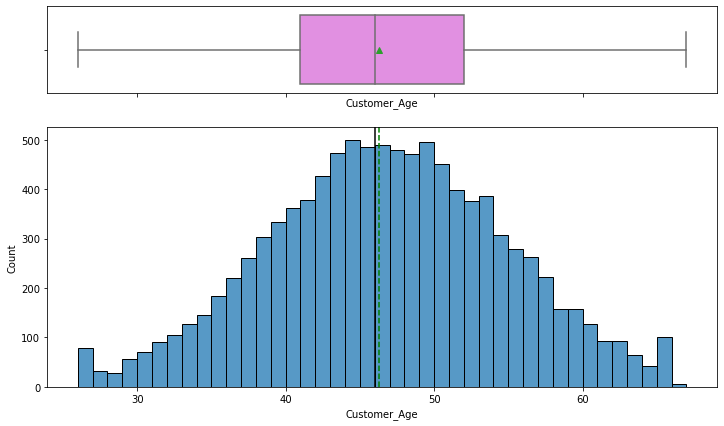

<IPython.core.display.Javascript object>

In [73]:
histogram_boxplot(df, "Customer_Age")

Age Has a fairly normal distribution

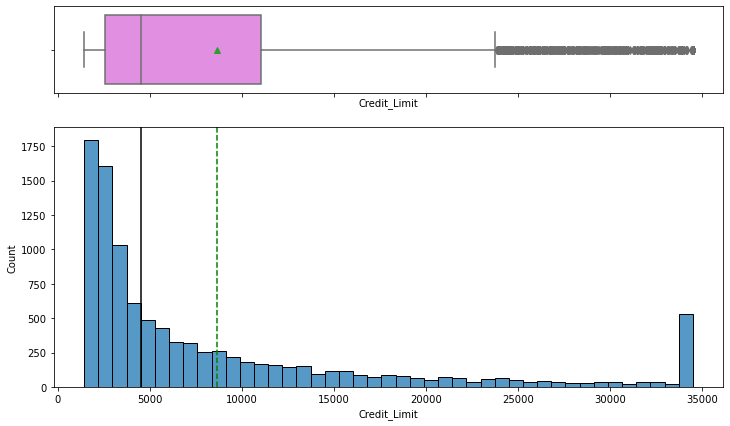

<IPython.core.display.Javascript object>

In [76]:
histogram_boxplot(df, "Credit_Limit")

We see there are outliers beyond  250000

histogram_boxplot(df, "Total_Revolving_Bal")

No outliers

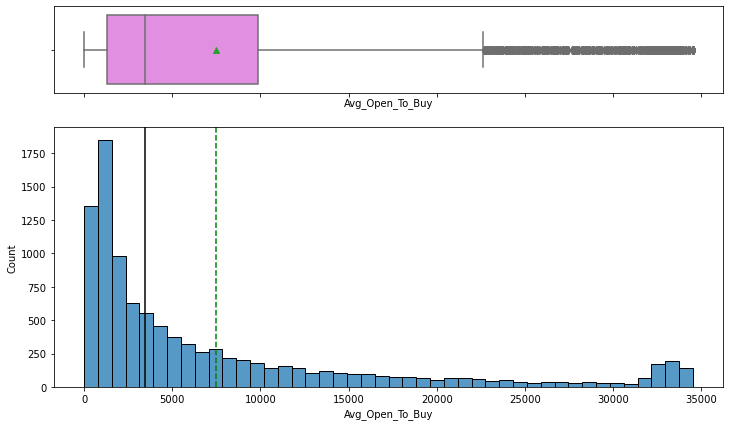

<IPython.core.display.Javascript object>

In [83]:
histogram_boxplot(df, "Avg_Open_To_Buy")

There are outliers but these cant be ignored from the model

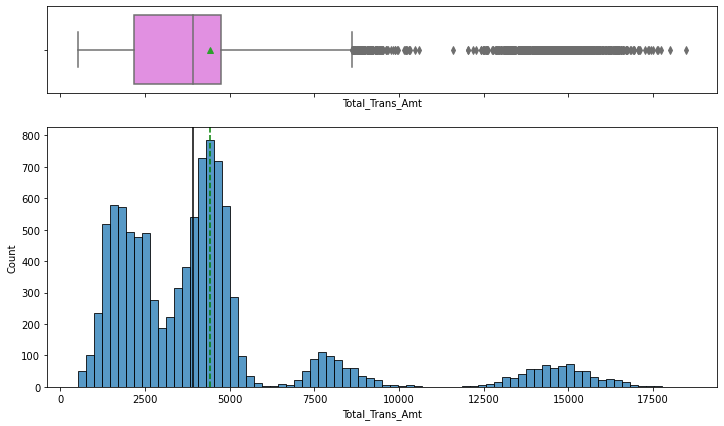

<IPython.core.display.Javascript object>

In [95]:
histogram_boxplot(df, "Total_Trans_Amt")

We see various trends being followed

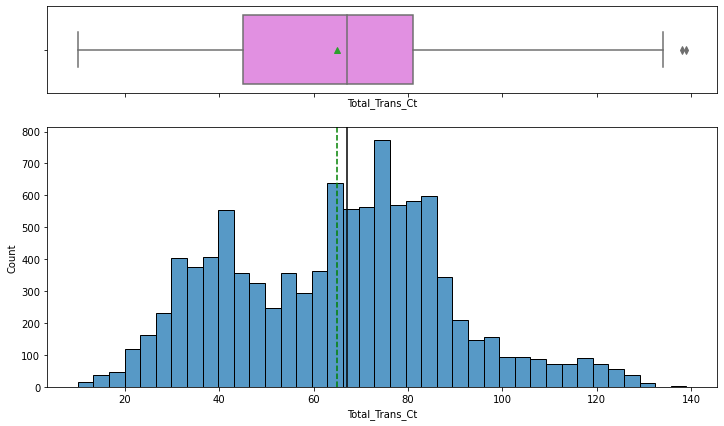

<IPython.core.display.Javascript object>

In [96]:
histogram_boxplot(df, "Total_Trans_Ct")

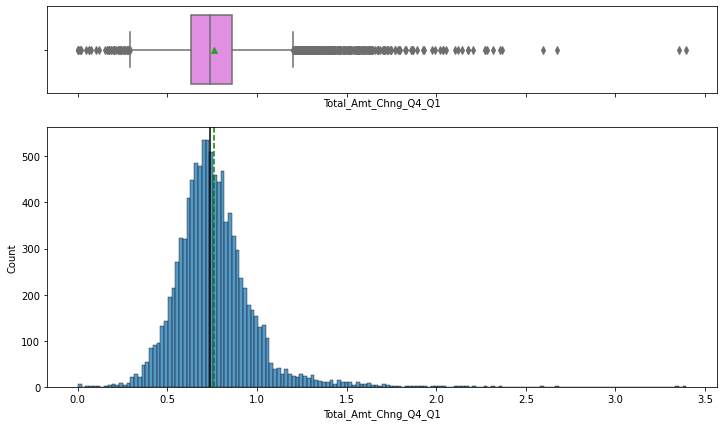

<IPython.core.display.Javascript object>

In [98]:
histogram_boxplot(df, "Total_Amt_Chng_Q4_Q1")

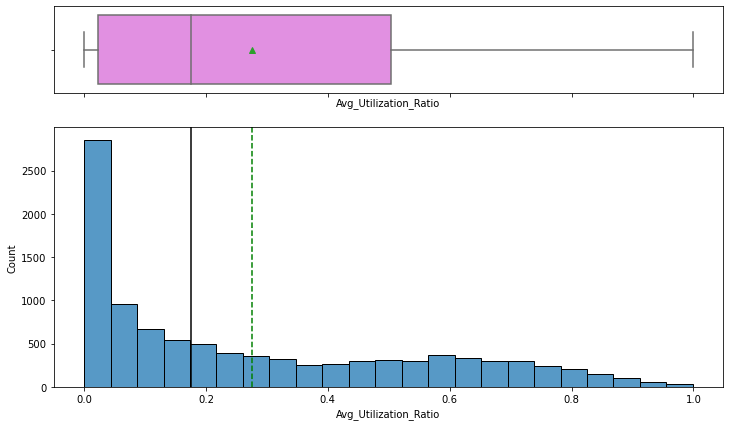

<IPython.core.display.Javascript object>

In [99]:
histogram_boxplot(df, "Avg_Utilization_Ratio")

In [102]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

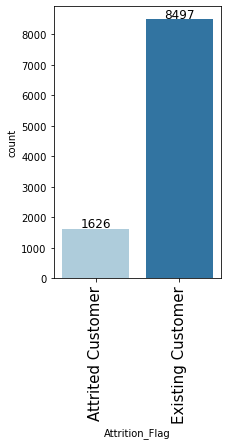

<IPython.core.display.Javascript object>

In [103]:
labeled_barplot(df, "Attrition_Flag")

We see that there are 8497 exisiting cuatomers and 1626 attired customers

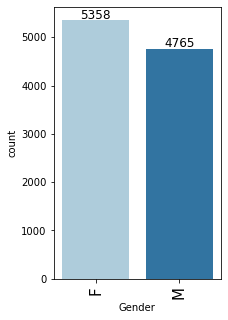

<IPython.core.display.Javascript object>

In [104]:
labeled_barplot(df, "Gender")

It can be seen that the majority of the the customers are female

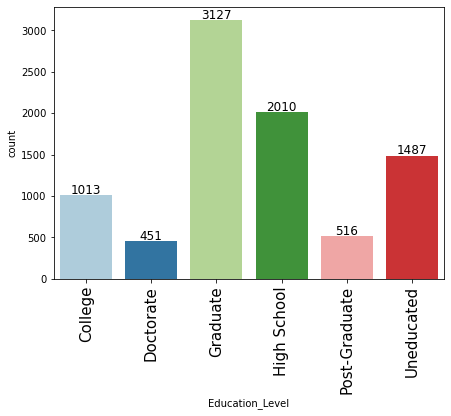

<IPython.core.display.Javascript object>

In [106]:
labeled_barplot(df, "Education_Level")

Around 3127 of the customers are graduates which is the majority followed by uneducated people

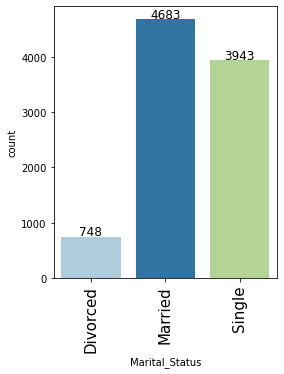

<IPython.core.display.Javascript object>

In [107]:
labeled_barplot(df, "Marital_Status")

Most of the population is Married with 4683 people followed by single

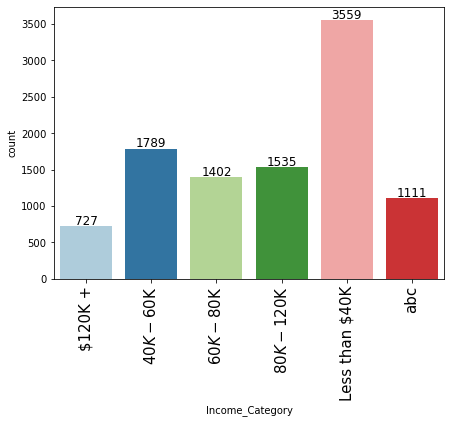

<IPython.core.display.Javascript object>

In [108]:
labeled_barplot(df, "Income_Category")

Most of the population earns less than  40,000 per annum followed by the second group earning between $40000 to  60000

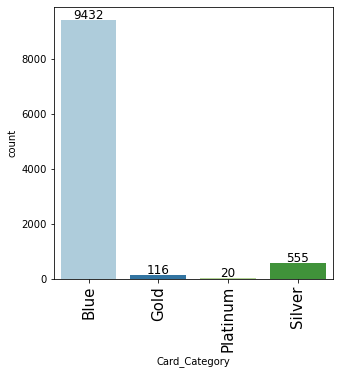

<IPython.core.display.Javascript object>

In [109]:
labeled_barplot(df, "Card_Category")

We notice that most of the users have a blue card which is the basic one followed by the silver card

# Bivariative Analysis

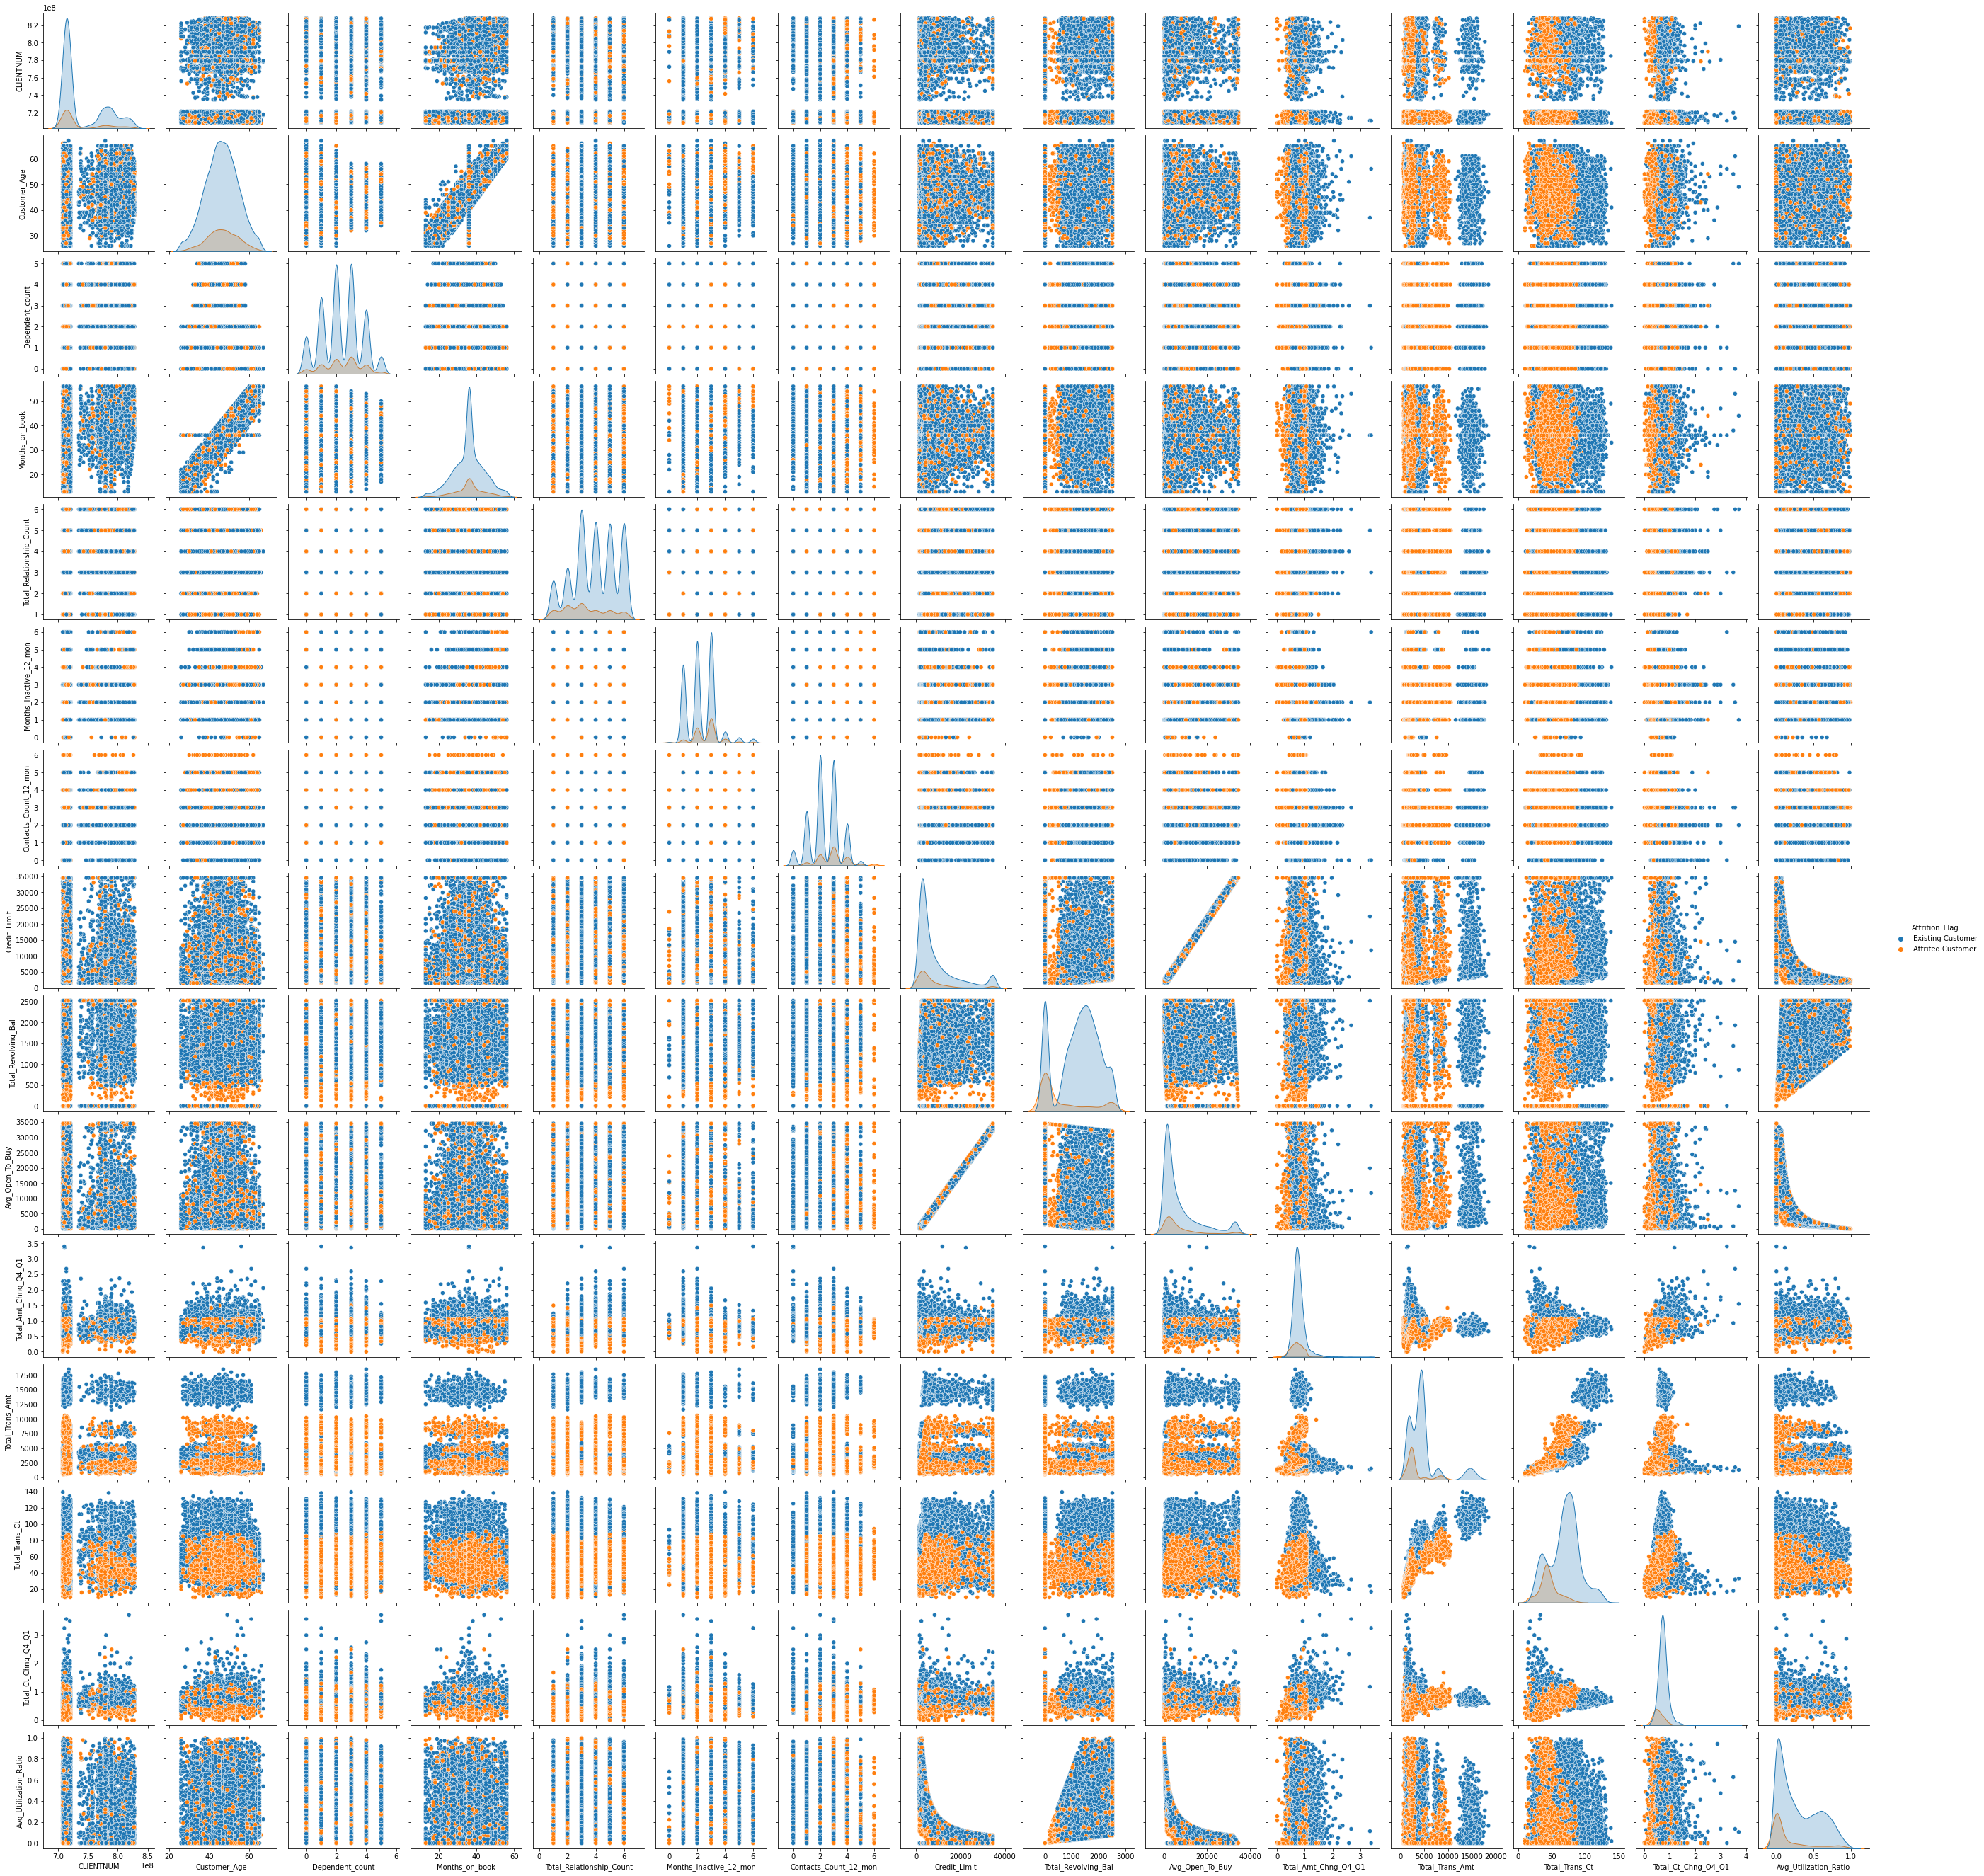

<IPython.core.display.Javascript object>

In [110]:
sns.pairplot(df, hue="Attrition_Flag")

A clear difference can be seen in the trend in the graphs in a few comparisons

Lets further explore this

<AxesSubplot:xlabel='Marital_Status', ylabel='Total_Revolving_Bal'>

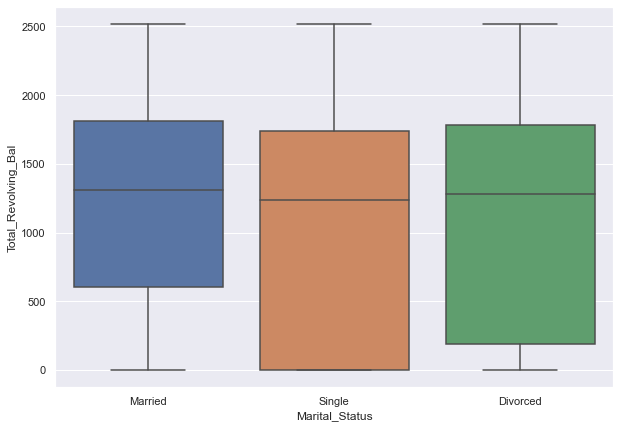

<IPython.core.display.Javascript object>

In [111]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(y="Total_Revolving_Bal", x="Marital_Status", data=data, orient="vertical")

We see that the avergae revolving balance of married customers is the highest followed by divorced customers

<AxesSubplot:xlabel='Marital_Status', ylabel='Total_Trans_Amt'>

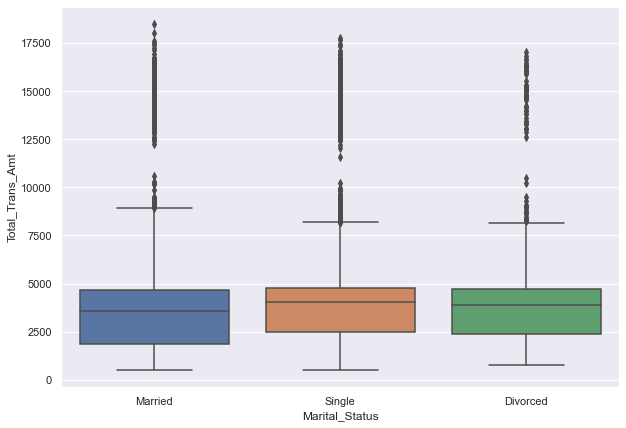

<IPython.core.display.Javascript object>

In [112]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(y="Total_Trans_Amt", x="Marital_Status", data=data, orient="vertical")

Total transction amount is comparitively the same for all customers

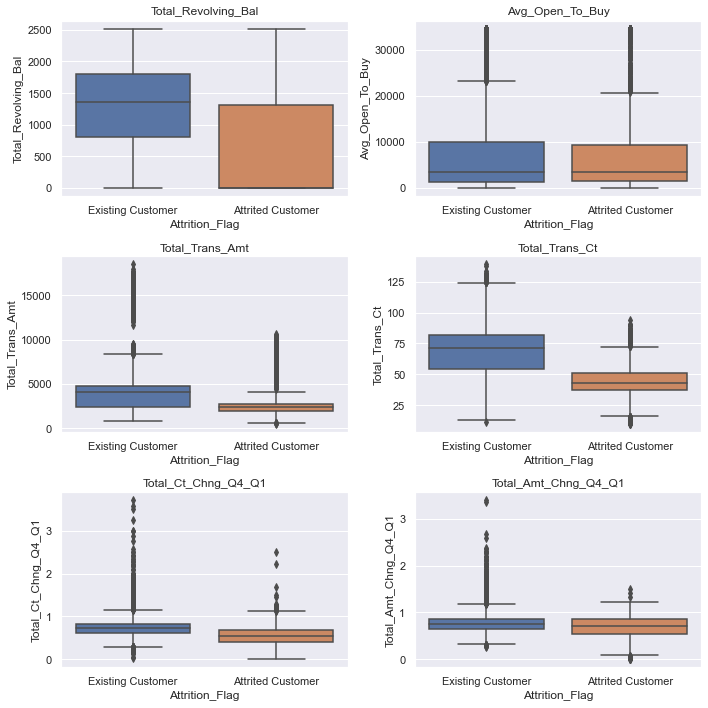

<IPython.core.display.Javascript object>

In [114]:
cols = df[
    [
        "Total_Revolving_Bal",
        "Avg_Open_To_Buy",
        "Total_Trans_Amt",
        "Total_Trans_Ct",
        "Total_Ct_Chng_Q4_Q1",
        "Total_Amt_Chng_Q4_Q1",
    ]
].columns.tolist()
plt.figure(figsize=(10, 10))

for i, variable in enumerate(cols):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(data["Attrition_Flag"], data[variable])
    plt.tight_layout()
    plt.title(variable)
plt.show()

We see the comparision of different factors with the target variable in the graph above

In [115]:
#fuction for stacked bar chart
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

Attrition_Flag   Attrited Customer  Existing Customer   All
Education_Level                                            
All                           1371               7237  8608
Graduate                       487               2641  3128
High School                    306               1707  2013
Uneducated                     237               1250  1487
College                        154                859  1013
Doctorate                       95                356   451
Post-Graduate                   92                424   516
------------------------------------------------------------------------------------------------------------------------


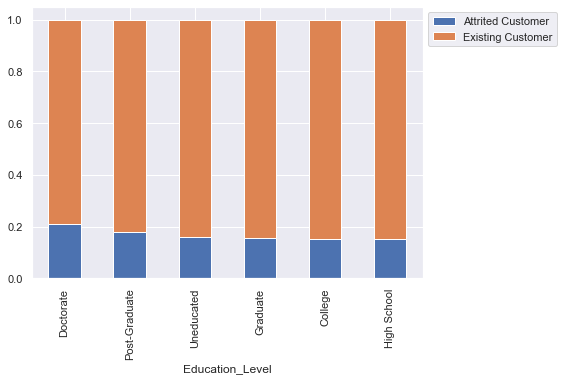

<IPython.core.display.Javascript object>

In [116]:
stacked_barplot(data, "Education_Level", "Attrition_Flag")

Attrition_Flag  Attrited Customer  Existing Customer   All
Marital_Status                                            
All                          1498               7880  9378
Married                       709               3978  4687
Single                        668               3275  3943
Divorced                      121                627   748
------------------------------------------------------------------------------------------------------------------------


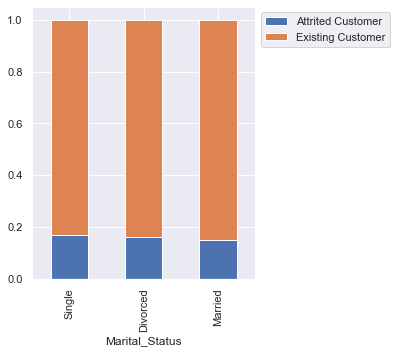

<IPython.core.display.Javascript object>

In [117]:
stacked_barplot(data, "Marital_Status", "Attrition_Flag")

Attrition_Flag   Attrited Customer  Existing Customer    All
Income_Category                                             
All                           1627               8500  10127
Less than $40K                 612               2949   3561
$40K - $60K                    271               1519   1790
$80K - $120K                   242               1293   1535
$60K - $80K                    189               1213   1402
abc                            187                925   1112
$120K +                        126                601    727
------------------------------------------------------------------------------------------------------------------------


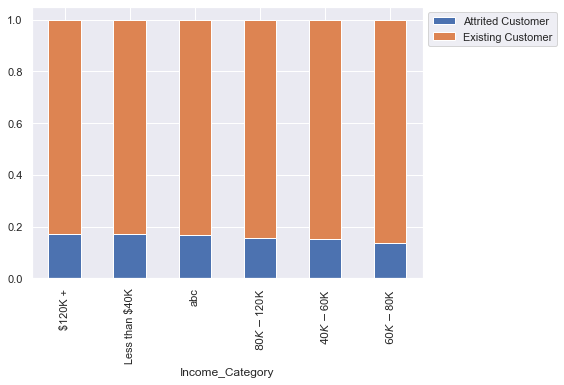

<IPython.core.display.Javascript object>

In [118]:
stacked_barplot(data, "Income_Category", "Attrition_Flag")

Attrition_Flag  Attrited Customer  Existing Customer    All
Card_Category                                              
All                          1627               8500  10127
Blue                         1519               7917   9436
Silver                         82                473    555
Gold                           21                 95    116
Platinum                        5                 15     20
------------------------------------------------------------------------------------------------------------------------


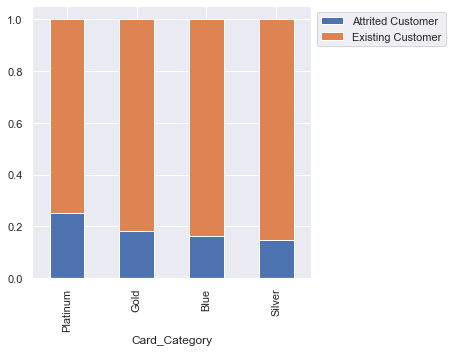

<IPython.core.display.Javascript object>

In [119]:
stacked_barplot(data, "Card_Category", "Attrition_Flag")

The graphs above show us the factor differntiating what group of people stay as customers

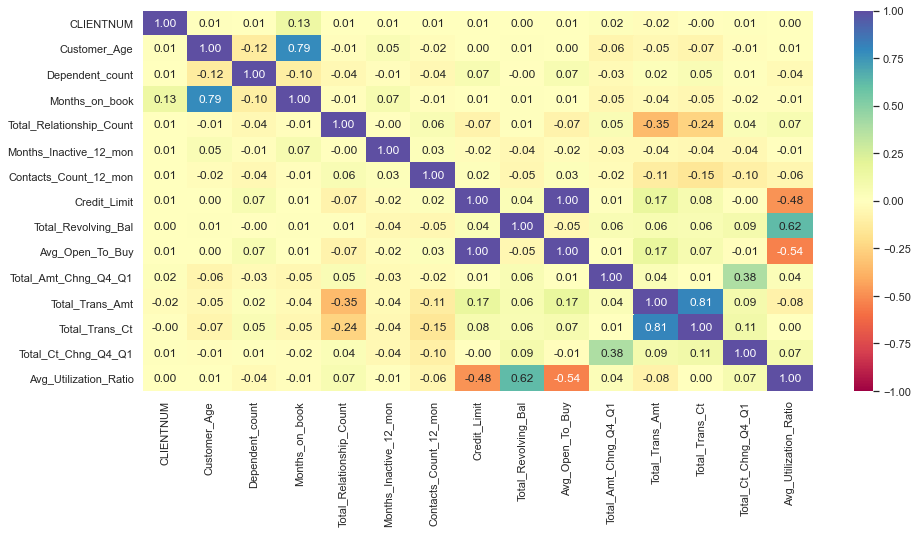

<IPython.core.display.Javascript object>

In [120]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

One of the biggest factors with the highest and strongest corellation (0.79) is the months on book against the age of the customers 

This is follwed by average utilization ratio vs total revolving balance (0.62)

Even avergae open to buy vs average utilization has a comparitively good corellation which is 0.54

# Preparing the data

In [17]:
df["Attrition_Flag"] = df["Attrition_Flag"].replace("Existing Customer", "1")
df["Attrition_Flag"] = df["Attrition_Flag"].replace("Attrited Customer", "0")


<IPython.core.display.Javascript object>

In [18]:
df["Attrition_Flag"] = pd.to_numeric(df["Attrition_Flag"])


<IPython.core.display.Javascript object>

In [19]:
# Sperating the target variable
X = df.drop(columns="Attrition_Flag")
X = pd.get_dummies(X)

Y = df["Attrition_Flag"]

<IPython.core.display.Javascript object>

In [20]:
# Splitting data into training, validation and test set
#first split temprory and test datasets
X_temp, X_test, y_temp, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=1, stratify=Y
)

# then split temporary set into train and validation sets

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(6073, 35) (2025, 35) (2025, 35)


<IPython.core.display.Javascript object>

# Treating Missing Values

In [21]:
#using median to impute missing values
imputer = SimpleImputer(strategy="median")
impute = imputer.fit(X_train)

X_train = impute.transform(X_train)
X_val = imputer.transform(X_val)
X_test = imputer.transform(X_test)

<IPython.core.display.Javascript object>

# Building the model

Model evaluation 

Predicting a customer will not leave the service and the customer leaves would lead to a loss

Company wants Recall to be maximized, greater the Recall lesser the chances of false negatives.

In [22]:
models = []  


models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results = []  
names = []  



print("\n" "Cross-Validation Performance:" "\n")

for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    ) 
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Training Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train)) * 100
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

Bagging: 97.37106736708424
Random forest: 98.74434759183359
GBM: 98.74434759183359
Adaboost: 97.93982951374858
Xgboost: 98.74427062287133
dtree: 96.21349265908522

Training Performance:

Bagging: 99.84304492838925
Random forest: 100.0
GBM: 99.27408279380028
Adaboost: 98.2538748283304
Xgboost: 100.0
dtree: 100.0


<IPython.core.display.Javascript object>

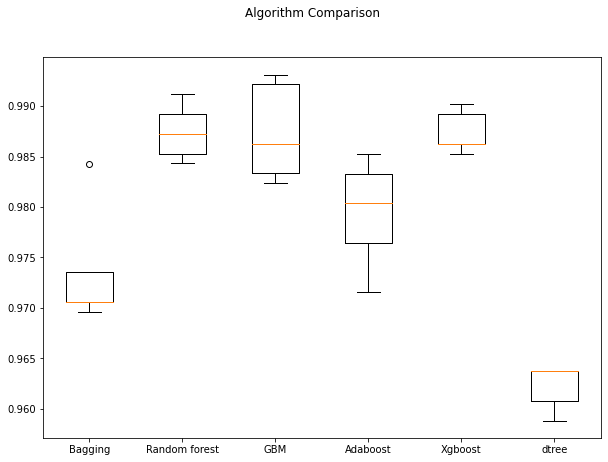

<IPython.core.display.Javascript object>

In [23]:
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

# Hyperparameter Tuning

In [24]:
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  #compute Accuracy
    recall = recall_score(target, pred)  #  compute Recall
    precision = precision_score(target, pred)  # compute Precision
    f1 = f1_score(target, pred)  # compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [25]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

# AdaBoost

#### GridSearchCV

In [26]:
%%time 
model = AdaBoostClassifier(random_state=1)

param_grid = {
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
scorer = metrics.make_scorer(metrics.recall_score)
grid_cv = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1)

grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'base_estimator': DecisionTreeClassifier(max_depth=1, random_state=1), 'learning_rate': 0.1, 'n_estimators': 10} 
Score: 1.0
CPU times: user 1.91 s, sys: 333 ms, total: 2.24 s
Wall time: 2min 1s


<IPython.core.display.Javascript object>

In [27]:
#model with brst parameters
adb_tuned1 = AdaBoostClassifier(
    n_estimators=10,
    learning_rate=0.1,
    random_state=1,
    base_estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
)

# Fitting the model on training data
adb_tuned1.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=10, random_state=1)

<IPython.core.display.Javascript object>

In [28]:
#different metrics on training set
Adaboost_grid_train = model_performance_classification_sklearn(
    adb_tuned1, X_train, y_train
)
print("Training performance:")
Adaboost_grid_train

Training performance:


Accuracy  Recall  Precision    F1
0     0.931   0.982      0.939 0.960

<IPython.core.display.Javascript object>

In [29]:
#different metrics on validation set
Adaboost_grid_val = model_performance_classification_sklearn(adb_tuned1, X_val, y_val)
print("Validation performance:")
Adaboost_grid_val

Validation performance:


Accuracy  Recall  Precision    F1
0     0.927   0.981      0.936 0.958

<IPython.core.display.Javascript object>

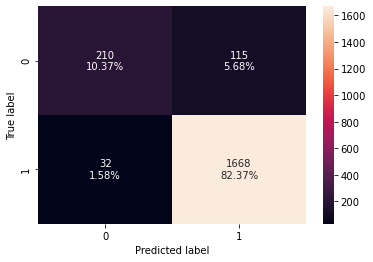

<IPython.core.display.Javascript object>

In [30]:
#confusion matrix
confusion_matrix_sklearn(adb_tuned1, X_val, y_val)


### RandomizedSearchCV

In [31]:
%%time 

model = AdaBoostClassifier(random_state=1)

param_grid = {
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 50, 'learning_rate': 0.01, 'base_estimator': DecisionTreeClassifier(max_depth=1, random_state=1)} with CV score=1.0:
CPU times: user 997 ms, sys: 84.3 ms, total: 1.08 s
Wall time: 44.7 s


<IPython.core.display.Javascript object>

In [32]:
adb_tuned2 = AdaBoostClassifier(
    n_estimators=50,
    learning_rate=0.01,
    random_state=1,
    base_estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
)

# Fit the model on training data
adb_tuned2.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.01, random_state=1)

<IPython.core.display.Javascript object>

In [33]:
Adaboost_random_train = model_performance_classification_sklearn(
    adb_tuned2, X_train, y_train
)
print("Training performance:")
Adaboost_random_train

Training performance:


Accuracy  Recall  Precision    F1
0     0.928   0.973      0.942 0.958

<IPython.core.display.Javascript object>

In [34]:
Adaboost_random_val = model_performance_classification_sklearn(adb_tuned2, X_val, y_val)
print("Validation performance:")
Adaboost_random_val

Validation performance:


Accuracy  Recall  Precision    F1
0     0.920   0.969      0.938 0.953

<IPython.core.display.Javascript object>

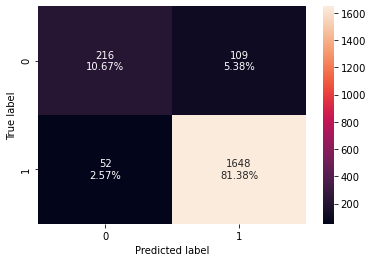

<IPython.core.display.Javascript object>

In [35]:
confusion_matrix_sklearn(adb_tuned2, X_val, y_val)

# XGBoost


### GridSearchCV

In [37]:
%%time 

#defining model
model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in GridSearchCV
param_grid={'n_estimators':np.arange(50,150,50),
            'scale_pos_weight':[2,5,10],
            'learning_rate':[0.01,0.1,0.2,0.05],
            'gamma':[0,1,3,5],
            'subsample':[0.8,0.9,1],
            'max_depth':np.arange(1,5,1),
            'reg_lambda':[5,10]}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling GridSearchCV
grid_cv = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1, verbose= 2)

#Fitting parameters in GridSearchCV
grid_cv.fit(X_train,y_train)


print("Best parameters are {} with CV score={}:" .format(grid_cv.best_params_,grid_cv.best_score_))

Fitting 5 folds for each of 2304 candidates, totalling 11520 fits
Best parameters are {'gamma': 0, 'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50, 'reg_lambda': 5, 'scale_pos_weight': 2, 'subsample': 0.8} with CV score=1.0:
CPU times: user 33.9 s, sys: 3.7 s, total: 37.6 s
Wall time: 34min 25s


<IPython.core.display.Javascript object>

In [46]:
xgb_tuned1 = XGBClassifier(
    random_state=1,
    n_estimators=50,
    scale_pos_weight=2,
    subsample=0.8,
    learning_rate=0.01,
    gamma=0,
    eval_metric="logloss",
    reg_lambda=5,
    max_depth=1,
)

# Fit the model on training data
xgb_tuned1.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.01, max_delta_step=0,
              max_depth=1, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=8,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=5,
              scale_pos_weight=2, subsample=0.8, tree_method='exact',
              validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

In [47]:
xgboost_grid_train = model_performance_classification_sklearn(
    xgb_tuned1, X_train, y_train
)
print("Training performance:")
xgboost_grid_train

Training performance:


Accuracy  Recall  Precision    F1
0     0.839   1.000      0.839 0.913

<IPython.core.display.Javascript object>

In [48]:
xgboost_grid_val = model_performance_classification_sklearn(xgb_tuned1, X_val, y_val)
print("Validation performance:")
xgboost_grid_val

Validation performance:


Accuracy  Recall  Precision    F1
0     0.840   1.000      0.840 0.913

<IPython.core.display.Javascript object>

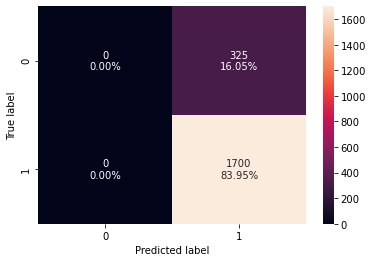

<IPython.core.display.Javascript object>

In [49]:
confusion_matrix_sklearn(xgb_tuned1, X_val, y_val)

## RandomizedSearchCV

In [42]:
%%time

# defining model
model = XGBClassifier(random_state=1,eval_metric='logloss')

# Parameter grid to pass in RandomizedSearchCV
param_grid={'n_estimators':np.arange(50,150,50),
            'scale_pos_weight':[2,5,10],
            'learning_rate':[0.01,0.1,0.2,0.05],
            'gamma':[0,1,3,5],
            'subsample':[0.8,0.9,1],
            'max_depth':np.arange(1,5,1),
            'reg_lambda':[5,10]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
xgb_tuned2 = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
xgb_tuned2.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(xgb_tuned2.best_params_,xgb_tuned2.best_score_))

Best parameters are {'subsample': 0.8, 'scale_pos_weight': 2, 'reg_lambda': 10, 'n_estimators': 100, 'max_depth': 1, 'learning_rate': 0.01, 'gamma': 5} with CV score=1.0:
CPU times: user 1.45 s, sys: 167 ms, total: 1.62 s
Wall time: 40 s


<IPython.core.display.Javascript object>

In [50]:
xgb_tuned2 = XGBClassifier(
    random_state=1,
    n_estimators=100,
    scale_pos_weight=2,
    gamma=5,
    subsample=0.8,
    learning_rate=0.01,
    eval_metric="logloss",
    max_depth=1,
    reg_lambda=10,
)
# Fit the model on training data
xgb_tuned2.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=5, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.01, max_delta_step=0,
              max_depth=1, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=10,
              scale_pos_weight=2, subsample=0.8, tree_method='exact',
              validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

In [51]:
xgboost_random_train = model_performance_classification_sklearn(
    xgb_tuned2, X_train, y_train
)
print("Training performance:")
xgboost_random_train

Training performance:


Accuracy  Recall  Precision    F1
0     0.839   1.000      0.839 0.913

<IPython.core.display.Javascript object>

In [52]:
xgboost_random_val = model_performance_classification_sklearn(xgb_tuned2, X_val, y_val)
print("Validation performance:")
xgboost_random_val

Validation performance:


Accuracy  Recall  Precision    F1
0     0.840   1.000      0.840 0.913

<IPython.core.display.Javascript object>

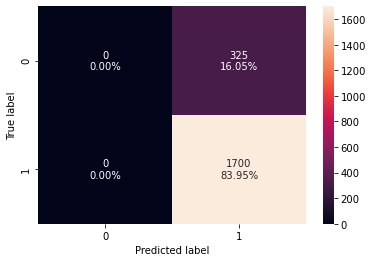

<IPython.core.display.Javascript object>

In [53]:
confusion_matrix_sklearn(xgb_tuned2, X_val, y_val)

# Comparing all models

In [54]:
models_train_comp_df = pd.concat(
    [
        Adaboost_grid_train.T,
        Adaboost_random_train.T,
        xgboost_grid_train.T,
        xgboost_random_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "AdaBoost Tuned with Grid search",
    "AdaBoost Tuned with Random search",
    "Xgboost Tuned with Grid search",
    "Xgboost Tuned with Random Search",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


AdaBoost Tuned with Grid search  AdaBoost Tuned with Random search  \
Accuracy                             0.931                              0.928   
Recall                               0.982                              0.973   
Precision                            0.939                              0.942   
F1                                   0.960                              0.958   

           Xgboost Tuned with Grid search  Xgboost Tuned with Random Search  
Accuracy                            0.839                             0.839  
Recall                              1.000                             1.000  
Precision                           0.839                             0.839  
F1                                  0.913                             0.913

<IPython.core.display.Javascript object>

In [55]:
models_val_comp_df = pd.concat(
    [
        Adaboost_grid_val.T,
        Adaboost_random_val.T,
        xgboost_grid_val.T,
        xgboost_random_val.T,
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "AdaBoost Tuned with Grid search",
    "AdaBoost Tuned with Random search",
    "Xgboost Tuned with Grid search",
    "Xgboost Tuned with Random Search",
]
print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


AdaBoost Tuned with Grid search  AdaBoost Tuned with Random search  \
Accuracy                             0.927                              0.920   
Recall                               0.981                              0.969   
Precision                            0.936                              0.938   
F1                                   0.958                              0.953   

           Xgboost Tuned with Grid search  Xgboost Tuned with Random Search  
Accuracy                            0.840                             0.840  
Recall                              1.000                             1.000  
Precision                           0.840                             0.840  
F1                                  0.913                             0.913

<IPython.core.display.Javascript object>

The AdaBoost with Tuned Grid search has the best recall without overfitting of 0.981 on the train set

In [56]:
Adaboost_grid_test = model_performance_classification_sklearn(
    adb_tuned1, X_test, y_test
)
print("Test performance:")
Adaboost_grid_test

Test performance:


Accuracy  Recall  Precision    F1
0     0.935   0.984      0.941 0.962

<IPython.core.display.Javascript object>

The performance on the test set is similar to the validation set

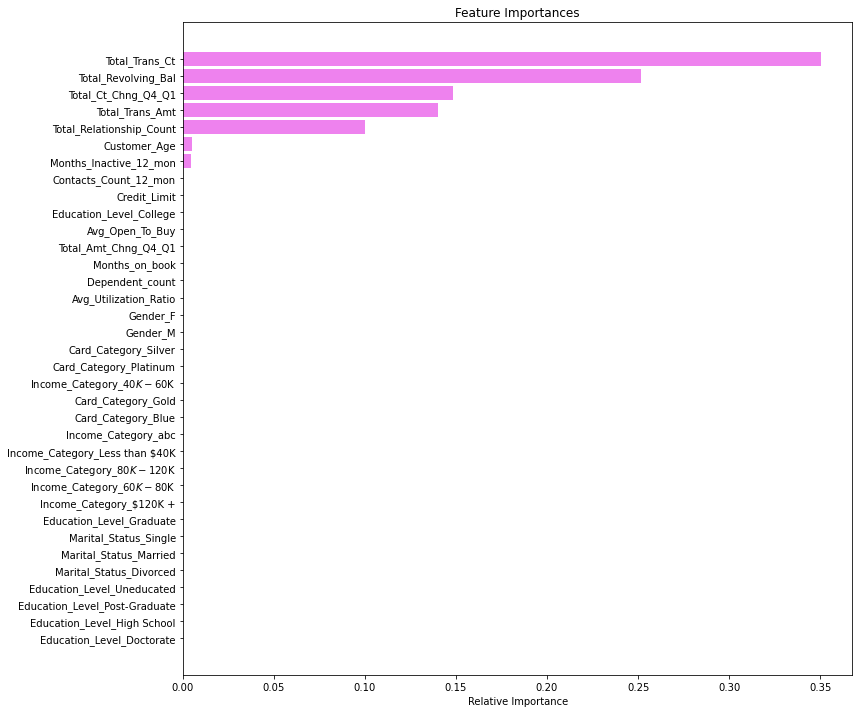

<IPython.core.display.Javascript object>

In [57]:
feature_names = X.columns
importances = adb_tuned1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

The most important feature is the total count of transactions followed by the total revolving balance

### Column Transfer

In [58]:
numerical_features = [
    "Customer_Age",
    "Dependent_count",
    "Months_on_book",
    "Total_Relationship_Count",
    "Months_Inactive_12_mon",
    "Contacts_Count_12_mon",
    "Credit_Limit",
    "Total_Revolving_Bal",
    "Avg_Open_To_Buy",
    "Total_Trans_Amt",
    "Total_Trans_Ct",
    "Total_Ct_Chng_Q4_Q1",
    "Total_Amt_Chng_Q4_Q1",
    "Avg_Utilization_Ratio",
]

# creating a transformer for numerical variables, which will apply simple imputer on the numerical variables
numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median"))])


# creating a list of categorical variables
categorical_features = [
    "Gender",
    "Education_Level",
    "Marital_Status",
    "Income_Category",
    "Card_Category",
]

# creating a transformer for categorical variables, which will first apply simple imputer and
# then do one hot encoding for categorical variables
categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)
# handle_unknown = "ignore", allows model to handle any unknown category in the test data

# combining categorical transformer and numerical transformer using a column transformer

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features),
    ],
    remainder="passthrough",
)

<IPython.core.display.Javascript object>

In [60]:
X = df.drop(columns="Attrition_Flag")
Y = df["Attrition_Flag"]

<IPython.core.display.Javascript object>

In [61]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)
print(X_train.shape, X_test.shape)

(7086, 19) (3037, 19)


<IPython.core.display.Javascript object>

In [66]:
# Creating new pipeline with best parameters
model = Pipeline(
    steps=[
        ("pre", preprocessor),
        (
            "Ada",
            AdaBoostClassifier(random_state=1, n_estimators=10, learning_rate=0.1,),
        ),
    ]
)
# Fit the model on training data
model.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Customer_Age',
                                                   'Dependent_count',
                                                   'Months_on_book',
                                                   'Total_Relationship_Count',
                                                   'Months_Inactive_12_mon',
                                                   'Contacts_Count_12_mon',
                                                   'Credit_Limit',
                                                   'Total_Revolving_Bal',
                                                   'Avg_Open_To_Buy',
                            

<IPython.core.display.Javascript object>

In [67]:
model.predict(X_test)

array([1, 1, 1, ..., 1, 1, 1])

<IPython.core.display.Javascript object>

# Bussiness Recommendations

Company should target customers who have most number of transactions per year and try to retain the cleints

We see that most of the cutomers that are targeted are Graduates, and other people with different levels of education such as post-graduate or doctrate are not targetted more

We also see that most of the customers make less than 40K per annum and this should be increased by targeting people of different economic status

The existing customers should be offered perks such as cashbacks, discounts and benefits on purchases made. 

There should be beneifts put in place if a customers transactions exceed more tham 10000 a year 

There should be changes made to the existing loyalty palns and more benfits should be given to the customers bringing in referrals